In [1]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
db = json.load(open('/users/karolkul/temp/pytand/dane/usda_food/database.json'))

In [3]:
len(db)

6636

In [4]:
db[0].keys()

dict_keys(['id', 'description', 'tags', 'manufacturer', 'group', 'portions', 'nutrients'])

In [5]:
db[0]['nutrients'][0]

{'value': 25.18,
 'units': 'g',
 'description': 'Protein',
 'group': 'Composition'}

In [6]:
id_nut = ['nutrients', 'id']

In [7]:
nutrients_1 = pd.DataFrame(db[0], columns=(id_nut))

In [8]:
nutrients_1

,nutrients,id
0,"{'value': 25.18, 'units': 'g', 'description': ...",1008
1,"{'value': 29.2, 'units': 'g', 'description': '...",1008
2,"{'value': 3.06, 'units': 'g', 'description': '...",1008
3,"{'value': 3.28, 'units': 'g', 'description': '...",1008
4,"{'value': 376.0, 'units': 'kcal', 'description...",1008
...,...,...
157,"{'value': 1.472, 'units': 'g', 'description': ...",1008
158,"{'value': 93.0, 'units': 'mg', 'description': ...",1008
159,"{'value': 18.584, 'units': 'g', 'description':...",1008
160,"{'value': 8.275, 'units': 'g', 'description': ...",1008


In [9]:
s=nutrients_1['nutrients'].apply(pd.Series)

In [10]:
s1=pd.concat([nutrients_1,s],axis=1)

In [11]:
s1

,nutrients,id,value,units,description,group
0,"{'value': 25.18, 'units': 'g', 'description': ...",1008,25.180,g,Protein,Composition
1,"{'value': 29.2, 'units': 'g', 'description': '...",1008,29.200,g,Total lipid (fat),Composition
2,"{'value': 3.06, 'units': 'g', 'description': '...",1008,3.060,g,"Carbohydrate, by difference",Composition
3,"{'value': 3.28, 'units': 'g', 'description': '...",1008,3.280,g,Ash,Other
4,"{'value': 376.0, 'units': 'kcal', 'description...",1008,376.000,kcal,Energy,Energy
...,...,...,...,...,...,...
157,"{'value': 1.472, 'units': 'g', 'description': ...",1008,1.472,g,Serine,Amino Acids
158,"{'value': 93.0, 'units': 'mg', 'description': ...",1008,93.000,mg,Cholesterol,Other
159,"{'value': 18.584, 'units': 'g', 'description':...",1008,18.584,g,"Fatty acids, total saturated",Other
160,"{'value': 8.275, 'units': 'g', 'description': ...",1008,8.275,g,"Fatty acids, total monounsaturated",Other


In [12]:
info_keys = ['description', 'group', 'id', 'manufacturer']

In [13]:
info = pd.DataFrame(db, columns=info_keys)

In [14]:
info[:5]

,description,group,id,manufacturer
0,"Cheese, caraway",Dairy and Egg Products,1008,
1,"Cheese, cheddar",Dairy and Egg Products,1009,
2,"Cheese, edam",Dairy and Egg Products,1018,
3,"Cheese, feta",Dairy and Egg Products,1019,
4,"Cheese, mozzarella, part skim milk",Dairy and Egg Products,1028,


In [15]:
info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6636 entries, 0 to 6635
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   description   6636 non-null   object
 1   group         6636 non-null   object
 2   id            6636 non-null   int64 
 3   manufacturer  5195 non-null   object
dtypes: int64(1), object(3)
memory usage: 207.5+ KB


In [16]:
pd.value_counts(info.group)[:10]

Vegetables and Vegetable Products    812
Beef Products                        618
Baked Products                       496
Breakfast Cereals                    403
Legumes and Legume Products          365
Fast Foods                           365
Lamb, Veal, and Game Products        345
Sweets                               341
Fruits and Fruit Juices              328
Pork Products                        328
Name: group, dtype: int64

In [17]:
nut_pieces = []
pieces = range(0, 6636)
for piece in pieces:
    nut = pd.DataFrame(db[piece], columns=(id_nut))
    nut_pieces.append(nut)
    

In [18]:
nutrients = pd.concat(nut_pieces, ignore_index=True)

In [19]:
nutrients

,nutrients,id
0,"{'value': 25.18, 'units': 'g', 'description': ...",1008
1,"{'value': 29.2, 'units': 'g', 'description': '...",1008
2,"{'value': 3.06, 'units': 'g', 'description': '...",1008
3,"{'value': 3.28, 'units': 'g', 'description': '...",1008
4,"{'value': 376.0, 'units': 'kcal', 'description...",1008
...,...,...
389350,"{'value': 0.0, 'units': 'mcg', 'description': ...",43546
389351,"{'value': 0.0, 'units': 'mg', 'description': '...",43546
389352,"{'value': 0.072, 'units': 'g', 'description': ...",43546
389353,"{'value': 0.028, 'units': 'g', 'description': ...",43546


In [20]:
s = nutrients['nutrients'].apply(pd.Series)

In [21]:
nutrients = pd.concat([nutrients,s],axis=1)

In [27]:
del nutrients['nutrients']

In [28]:
nutrients

,id,value,units,description,group
0,1008,25.180,g,Protein,Composition
1,1008,29.200,g,Total lipid (fat),Composition
2,1008,3.060,g,"Carbohydrate, by difference",Composition
3,1008,3.280,g,Ash,Other
4,1008,376.000,kcal,Energy,Energy
...,...,...,...,...,...
389350,43546,0.000,mcg,"Vitamin B-12, added",Vitamins
389351,43546,0.000,mg,Cholesterol,Other
389352,43546,0.072,g,"Fatty acids, total saturated",Other
389353,43546,0.028,g,"Fatty acids, total monounsaturated",Other


In [29]:
nutrients.duplicated().sum()

14179

In [30]:
nutrients = nutrients.drop_duplicates()

In [32]:
col_mapping = {'description': 'food',
              'group': 'fgroup'}

In [33]:
info = info.rename(columns=col_mapping, copy=False)

In [34]:
info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6636 entries, 0 to 6635
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   food          6636 non-null   object
 1   fgroup        6636 non-null   object
 2   id            6636 non-null   int64 
 3   manufacturer  5195 non-null   object
dtypes: int64(1), object(3)
memory usage: 207.5+ KB


In [35]:
col_mapping = {'description': 'nutrient',
              'group': 'nutgroup'}

In [36]:
nutrients = nutrients.rename(columns=col_mapping, copy=False)

In [37]:
nutrients

,id,value,units,nutrient,nutgroup
0,1008,25.180,g,Protein,Composition
1,1008,29.200,g,Total lipid (fat),Composition
2,1008,3.060,g,"Carbohydrate, by difference",Composition
3,1008,3.280,g,Ash,Other
4,1008,376.000,kcal,Energy,Energy
...,...,...,...,...,...
389350,43546,0.000,mcg,"Vitamin B-12, added",Vitamins
389351,43546,0.000,mg,Cholesterol,Other
389352,43546,0.072,g,"Fatty acids, total saturated",Other
389353,43546,0.028,g,"Fatty acids, total monounsaturated",Other


In [38]:
ndata = pd.merge(nutrients, info, on='id', how='outer')

In [39]:
ndata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 375176 entries, 0 to 375175
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            375176 non-null  int64  
 1   value         375176 non-null  float64
 2   units         375176 non-null  object 
 3   nutrient      375176 non-null  object 
 4   nutgroup      375176 non-null  object 
 5   food          375176 non-null  object 
 6   fgroup        375176 non-null  object 
 7   manufacturer  293054 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 25.8+ MB


In [41]:
ndata.iloc[30000]

id                                                6158
value                                             0.04
units                                                g
nutrient                                       Glycine
nutgroup                                   Amino Acids
food            Soup, tomato bisque, canned, condensed
fgroup                      Soups, Sauces, and Gravies
manufacturer                                          
Name: 30000, dtype: object

In [42]:
result = ndata.groupby(['nutrient', 'fgroup'])['value'].quantile(0.5)

In [49]:
result

nutrient          fgroup                           
Adjusted Protein  Sweets                               12.900
                  Vegetables and Vegetable Products     2.180
Alanine           Baby Foods                            0.085
                  Baked Products                        0.248
                  Beef Products                         1.550
                                                        ...  
Zinc, Zn          Snacks                                1.470
                  Soups, Sauces, and Gravies            0.200
                  Spices and Herbs                      2.750
                  Sweets                                0.360
                  Vegetables and Vegetable Products     0.330
Name: value, Length: 2246, dtype: float64

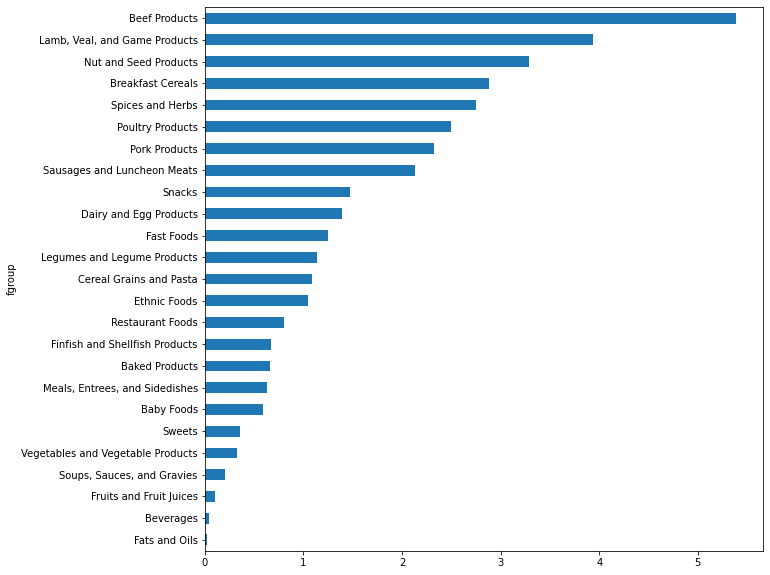

In [47]:
result['Zinc, Zn'].sort_values().plot(kind='barh', figsize=(10, 10))

In [50]:
by_nutrient = ndata.groupby(['nutgroup', 'nutrient'])

In [51]:
get_maximum = lambda x: x.loc[x.value.idxmax()]
get_minimum = lambda x: x.loc[x.value.idxmin()]

max_foods = by_nutrient.apply(get_maximum)[['value', 'food']]

max_foods.food = max_foods.food.str[:50]

In [52]:
max_foods.loc['Amino Acids']['food']

nutrient
Alanine                           Gelatins, dry powder, unsweetened
Arginine                               Seeds, sesame flour, low-fat
Aspartic acid                                   Soy protein isolate
Cystine                Seeds, cottonseed flour, low fat (glandless)
Glutamic acid                                   Soy protein isolate
Glycine                           Gelatins, dry powder, unsweetened
Histidine                Whale, beluga, meat, dried (Alaska Native)
Hydroxyproline    KENTUCKY FRIED CHICKEN, Fried Chicken, ORIGINA...
Isoleucine        Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
Leucine           Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
Lysine            Seal, bearded (Oogruk), meat, dried (Alaska Na...
Methionine                    Fish, cod, Atlantic, dried and salted
Phenylalanine     Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
Proline                           Gelatins, dry powder, unsweetened
Serine            Soy protein isolate, 